In [543]:
import time
import datetime
import McNeuron
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [479]:
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Desktop/neuronData/neurons.csv")
f = time.time()
print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))

17:02:47
17:04:00


In [506]:
indC = np.where(neurons['Experimental Condition']=='Control')[0]

In [565]:
indP = np.where(neurons['Primary Cell Class']=='principal cell')[0]
indI = np.where(neurons['Primary Cell Class']=='interneuron')[0]

swcP = [0] * 41497
swcI = [0] * 16898
#c = 0
counter = 0
for i in range(0,len(indP)) :
    if np.any(indC[:] == indP[i]) :
        swcP[i-counter] = neurons['swc'][indP[i]]
    else :
        counter += 1
for i in range(0,len(indI)) :
    if np.any(indC[:] == indI[i]) :
        #c += 1
        swcI[i-counter] = neurons['swc'][indI[i]]
    else :
        counter += 1

In [564]:
swcI[10760]

array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   4.80883000e+00,  -1.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,  -2.10000000e+00, ...,
          0.00000000e+00,   4.80883000e+00,   1.00000000e+00],
       [  3.00000000e+00,   1.00000000e+00,   2.10000000e+00, ...,
          0.00000000e+00,   4.80883000e+00,   1.00000000e+00],
       ..., 
       [  7.72000000e+02,   2.00000000e+00,   7.30000000e+00, ...,
          2.79000000e+00,   2.45000000e-01,   7.71000000e+02],
       [  7.73000000e+02,   2.00000000e+00,   6.76000000e+00, ...,
          4.34000000e+00,   2.45000000e-01,   7.72000000e+02],
       [  7.74000000e+02,   2.00000000e+00,   6.40000000e+00, ...,
          6.59000000e+00,   2.45000000e-01,   7.73000000e+02]])

In [577]:
def getVectors(swc, size) :
    n = [0] * size
    print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
    for i in range (0,size) :
        r = randint(0,len(swc)-1)
        neuron = McNeuron.Neuron(swc[r])
        neuron.l_measure_features()
        n[i] = neuron.getNeuronVector()
        if i%100==0 :
            print(i)
    print(datetime.datetime.fromtimestamp(time.time()).strftime('%H:%M:%S'))
    print('done')
    return n

In [573]:
#trainP,trainI,testP,testI

In [578]:
size = 10000
trainP = getVectors(swcP, size)
trainI = getVectors(swcI, size)
testP = getVectors(swcP, size)
testI = getVectors(swcI, size)

17:41:52
0


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:957: RuntimeWarning: divide by zero encountered in double_scalars
  e[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: divide by zero encountered in double_scalars
  t[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: invalid value encountered in double_scalars
  t[i] = np.arctan(h/b)
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:974: RuntimeWarning: invalid value encountered in absolute
  a[i] = max([np.abs(tiltLocal[2*i] + tiltLocal[2*i+1]),np.abs(tiltLocal[2*i] - tiltLocal[2*i+1])])
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/anirudhnatarajan/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value en

10
20


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1004: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (e/sum(e)))
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1005: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (t/sum(t)))
/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:1006: RuntimeWarning: invalid value encountered in true_divide
  n = np.append(n, (a/sum(a)))


30
40
50
60
70
80
90
17:42:00
done
17:42:00
0
10
20
30
40
50
60
70
80
90
17:42:15
done
17:42:15
0
10
20
30
40
50
60
70
80
90
17:42:25
done
17:42:25
0
10
20
30
40
50
60
70
80
90
17:42:43
done


In [586]:
#IMPORTANT
for i in range(0,len(testP)):
    if(np.isnan(testP[i][50])):
        r = randint(0,len(swcP)-1)
        neuron = McNeuron.Neuron(swcP[r])
        neuron.l_measure_features()
        testP[i] = neuron.getNeuronVector()
        if(np.isnan(testP[i][50])) :
            print('sad')
        else :
            print('good')

good
good


/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: divide by zero encountered in double_scalars
  t[i] = np.arctan(h/b)


In [591]:
trainP = np.vstack(trainP)
trainI = np.vstack(trainI)
testP = np.vstack(testP)
testI = np.vstack(testI)

train = np.concatenate((trainP,trainI))
test = np.concatenate((testP,testI))
y = np.concatenate(([0] * size,[1] * size))

In [592]:
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [605]:
#clf = svm.SVC()
clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier(RandomForestClassifier())
#clf = KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [617]:
clf.fit(train,y)
z = clf.predict(test)

sum = 0
for i in range(0,len(z)) :
    if (i<size) :
        if (z[i]==0) :
            sum = sum + 1
    elif (z[i]==1):
        sum = sum + 1
accuracy = sum / len(z)
print(accuracy)

0.6


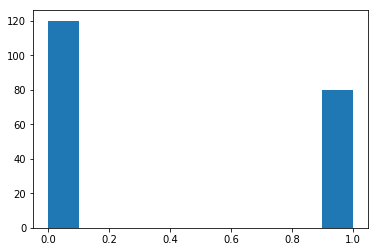

In [618]:
plt.hist(z)
plt.show()

In [445]:
p1 = McNeuron.Neuron(swcP[12])
p1.l_measure_features()
p2 = McNeuron.Neuron(swcI[12])
p2.l_measure_features()
clf.predict([p1.getNeuronVector(),p2.getNeuronVector()])

/Users/anirudhnatarajan/Documents/UPenn/McNeuron/McNeuron/Neuron.py:968: RuntimeWarning: divide by zero encountered in double_scalars
  t[i] = np.arctan(h/b)


array([0, 1])